In [4]:
from ipfml.processing.segmentation import divide_in_blocks
from ipfml.processing import transform
from ipfml.filters import convolution as conv
from ipfml.filters import kernels
from ipfml import utils

from PIL import Image
from scipy import signal
from skimage import color
import scipy.stats as stats
import seaborn as sns
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import svd
import os

In [5]:
data_folder = "../dataset"

# Data augmentation analysis

## Utils functions definition

In [6]:
def compute_images_path(dict_data):
    
    scene = dict_data['name']
    prefix = dict_data['prefix']
    indices = dict_data['indices']
    
    images_path = []
    for index in indices:
        path = os.path.join(data_folder, os.path.join(scene, prefix + index + ".png"))
        print(path)
        images_path.append(path)
    return images_path

In [7]:
def get_images_zones(dict_data, images_path):
    
    id_zone = dict_data['zone']
    
    zones_img = []
    for path in images_path:
        img = Image.open(path)
        zones = divide_in_blocks(img, (200, 200))
        zones_img.append(zones[id_zone])
        
    return zones_img

## Scenes information data

In [8]:
# start 00020 - ref 00900 - step 10
dict_appart = {'name': 'Appart1opt02', 
               'prefix': 'appartAopt_', 
               'indices': ["00050", "00100", "00200", "00300", "00400", "00500", "00700", "00900"],
               'zone': 9}

# start 00050 - ref 01200 - step 10
dict_cuisine = {'name': 'Cuisine01', 
               'prefix': 'cuisine01_', 
               'indices': ["00050", "00100", "00200", "00300", "00400", "00600", "00700","00900", "01200"],
               'zone': 6}

# start 00020 - ref 00950 - step 10
dict_sdb_c = {'name': 'SdbCentre', 
               'prefix': 'SdB2_', 
               'indices': ["00020", "00400", "00950"],
               'zone': 3}

# start 00020 - ref 00950 - step 10
dict_sdb_d = {'name': 'SdbDroite', 
               'prefix': 'SdB2_D_', 
               'indices': ["00020", "00400", "00950"],
               'zone': 3}

### Definition of parameters

In [9]:
images_path_appart = compute_images_path(dict_appart)
images_path_cuisine = compute_images_path(dict_cuisine)

../dataset/Appart1opt02/appartAopt_00050.png
../dataset/Appart1opt02/appartAopt_00100.png
../dataset/Appart1opt02/appartAopt_00200.png
../dataset/Appart1opt02/appartAopt_00300.png
../dataset/Appart1opt02/appartAopt_00400.png
../dataset/Appart1opt02/appartAopt_00500.png
../dataset/Appart1opt02/appartAopt_00700.png
../dataset/Appart1opt02/appartAopt_00900.png
../dataset/Cuisine01/cuisine01_00050.png
../dataset/Cuisine01/cuisine01_00100.png
../dataset/Cuisine01/cuisine01_00200.png
../dataset/Cuisine01/cuisine01_00300.png
../dataset/Cuisine01/cuisine01_00400.png
../dataset/Cuisine01/cuisine01_00600.png
../dataset/Cuisine01/cuisine01_00700.png
../dataset/Cuisine01/cuisine01_00900.png
../dataset/Cuisine01/cuisine01_01200.png


In [10]:
zones_appart = get_images_zones(dict_appart, images_path_appart)
zones_cuisine = get_images_zones(dict_cuisine, images_path_cuisine)

In [42]:
def display_augmented_images(zone):
    
    output_block_img = zone
    
    # Data augmentation!
    augmented_images = []
    legends = []
    rotations = [0, 90, 180, 270]
    img_flip_labels = ['original', 'horizontal']

    horizontal_img = output_block_img.transpose(Image.FLIP_LEFT_RIGHT)

    flip_images = [output_block_img, horizontal_img]

    # rotate and flip image to increase dataset size
    for id, flip in enumerate(flip_images):
        for id_rot, rotation in enumerate(rotations):
            rotated_output_img = flip.rotate(rotation)
            
            legend = img_flip_labels[id] + " " + str(rotations[id_rot])
            legends.append(legend)
            augmented_images.append(rotated_output_img)
            

    fig=plt.figure(figsize=(20, 10))
    rows = 4
    columns = 4
    
    for i, img in enumerate(augmented_images):
        
        ax1 = fig.add_subplot(rows, columns, (i+1))
        ax1.title.set_text(legends[i])

        # Turn off tick labels
        ax1.set_yticklabels([])
        ax1.set_xticklabels([])
                   
        plt.imshow(img)
    
    plt.show()
    

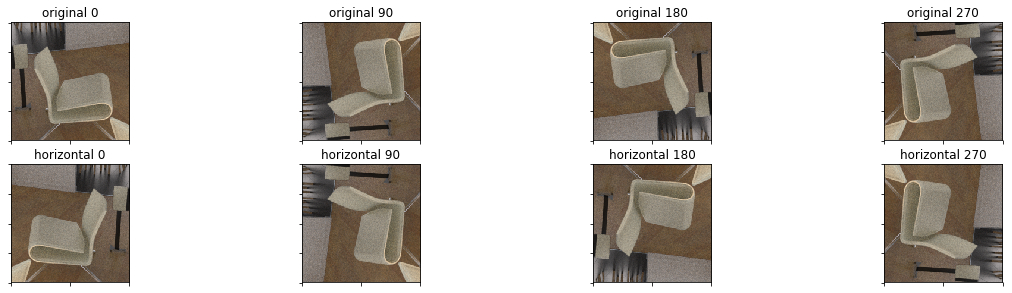

In [43]:
display_augmented_images(zones_appart[0])